In [57]:
from PIL import Image
from io import BytesIO
import torch
import torch.optim as optim
from torchvision import models,transforms
import numpy as np
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm

In [2]:
vgg=models.vgg19(pretrained=True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [3]:
# we do not neeed classifier and avg pool 
vgg=models.vgg19(pretrained=True).features
vgg

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [4]:
for parm in vgg.parameters():
    parm.requires_grad_(False)

In [71]:
def load_image(img_path):
    ''' Load in and transform an image, making sure the image
       is <= 400 pixels in the x-y dims.'''
    if "http" in img_path:
        response = requests.get(img_path)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(img_path).convert('RGB')
    
    # large images will slow down processing
    size=(250,250)
        
    in_transform = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    
    return image

In [72]:
content=load_image(r'C:\Users\pushp\Desktop\seg_train\meme.jpeg')
print(content.shape)
style=load_image(r'C:\Users\pushp\Desktop\seg_train\style.jpg')
print(style.shape)

torch.Size([1, 3, 250, 250])
torch.Size([1, 3, 250, 250])


In [73]:
def tensor_to_image(content):
    cont=content.clone().detach()
    cont=cont.numpy().squeeze()
    cont=cont.transpose(1,2,0)
    cont = cont * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    cont=cont.clip(0,1)
    return cont

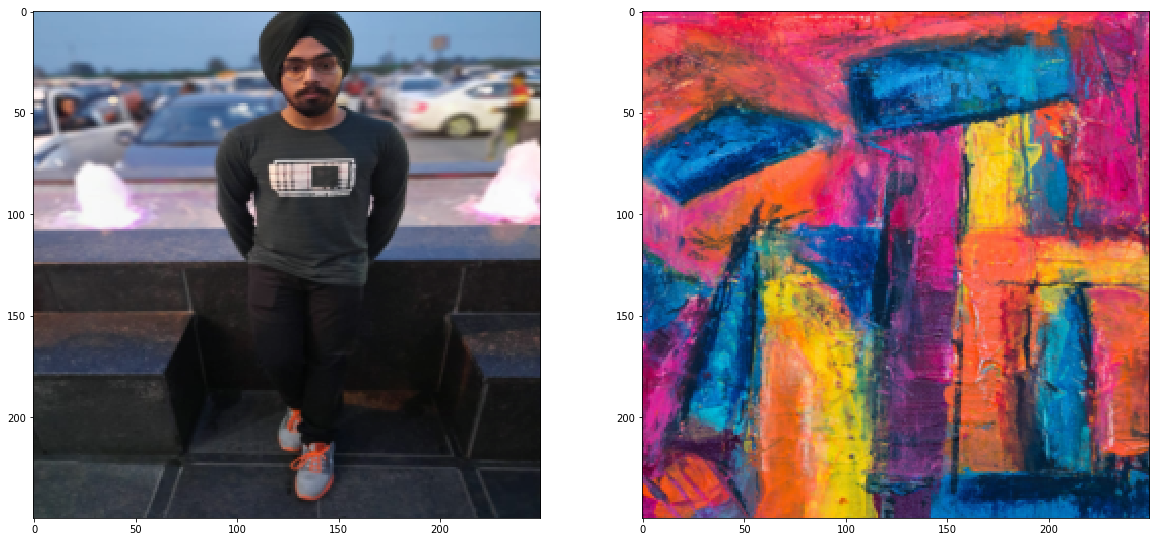

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(tensor_to_image(content))
ax2.imshow(tensor_to_image(style))

In [20]:
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [32]:
def get_features(image,model,layers=None):
    if layers is None:
        layers={'0': 'conv1_1',
                  '5': 'conv2_1', 
                  '10': 'conv3_1', 
                  '19': 'conv4_1',
                  '21': 'conv4_2',  ## content representation
                  '28': 'conv5_1'}
    features={}
    x=image
    for name,lay in model._modules.items():
        x=lay(x)
        if name in layers:
            features[layers[name]]=x
            
            
            
    return features

In [33]:
def gram_matrix(tensor):
    
    
    # get the batch_size, depth, height, and width of the Tensor
    _, d, h, w = tensor.size()
    
    # reshape so we're multiplying the features for each channel
    tensor = tensor.view(d, h * w)
    
    # calculate the gram matrix
    gram = torch.mm(tensor, tensor.t())
    
    return gram

  5%|▍         | 99/2000 [29:03<11:18:20, 21.41s/it]

Total loss:  107888928.0


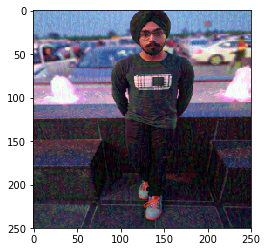

 10%|▉         | 199/2000 [54:32<7:07:49, 14.25s/it] 

Total loss:  63493564.0


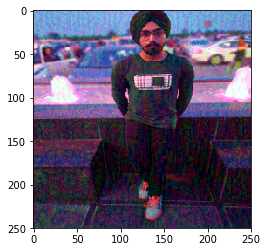

 15%|█▍        | 299/2000 [1:22:49<11:08:19, 23.57s/it]

Total loss:  44702888.0


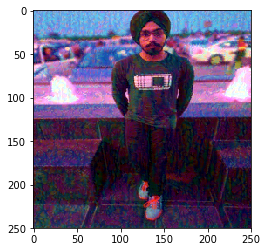

 20%|█▉        | 399/2000 [1:58:49<10:02:17, 22.57s/it]

Total loss:  33749836.0


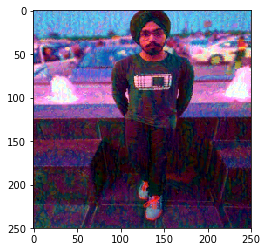

 25%|██▍       | 499/2000 [2:31:42<9:58:00, 23.90s/it] 

Total loss:  25739264.0


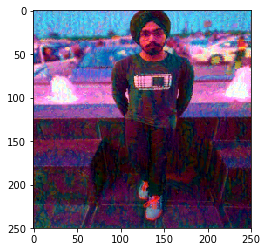

 30%|██▉       | 599/2000 [3:02:54<7:47:04, 20.00s/it] 

Total loss:  19908618.0


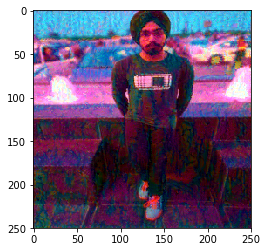

 35%|███▍      | 699/2000 [3:37:38<7:23:57, 20.47s/it] 

Total loss:  15774101.0


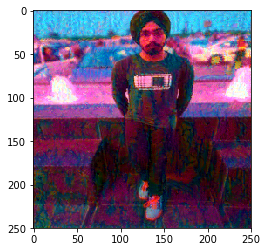

 40%|███▉      | 799/2000 [4:13:04<7:39:38, 22.96s/it]

Total loss:  12825265.0


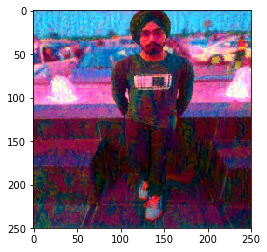

 45%|████▍     | 899/2000 [4:49:17<7:10:17, 23.45s/it]

Total loss:  10669529.0


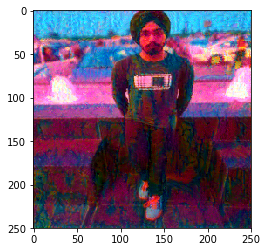

 50%|████▉     | 999/2000 [5:32:24<6:19:00, 22.72s/it]

Total loss:  9053652.0


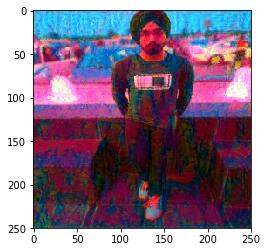

 55%|█████▍    | 1099/2000 [6:08:36<3:35:22, 14.34s/it] 

Total loss:  7810555.5


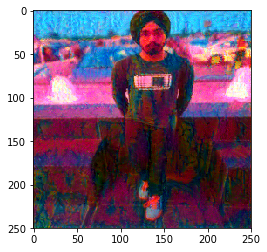

 60%|█████▉    | 1199/2000 [6:37:53<4:31:23, 20.33s/it]

Total loss:  6830043.5


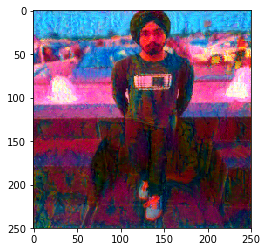

 65%|██████▍   | 1299/2000 [7:14:59<4:23:49, 22.58s/it]

Total loss:  6041100.0


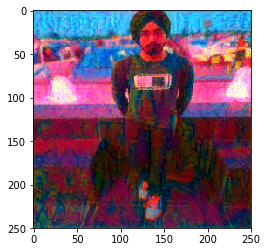

 70%|██████▉   | 1399/2000 [7:51:04<2:58:44, 17.84s/it]

Total loss:  5390527.0


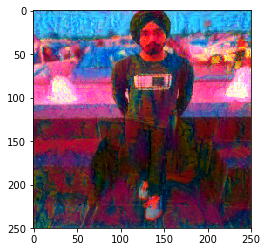

 75%|███████▍  | 1499/2000 [8:27:20<3:17:38, 23.67s/it]

Total loss:  4843309.0


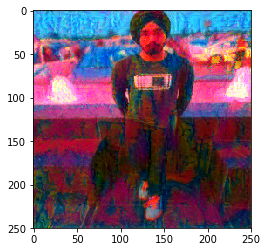

 78%|███████▊  | 1555/2000 [8:50:49<2:22:29, 19.21s/it]

KeyboardInterrupt: 

In [75]:
content_features=get_features(content,vgg)
style_features=get_features(style,vgg)
style_grams={layers:gram_matrix(style_features[layers]) for layers in style_features}
target=content.clone().requires_grad_(True)
style_weights = {'conv1_1': 1.,
                 'conv2_1': 0.75,
                 'conv3_1': 0.2,
                 'conv4_1': 0.2,
                 'conv5_1': 0.2}

content_weight = 1  # alpha
style_weight = 1e6  # beta

optimizer=optim.Adam([target],lr=0.003)
show=100 #show target after every 400 epoches
epoches=2000
for ii in tqdm(range(1,epoches+1),position=0,leave=True):
    target_features=get_features(target,vgg)
    content_loss=torch.mean((target_features['conv4_2']-content_features['conv4_2'])**2)
    styleloss=0
    for layer in style_weights:
        target_feature=target_features[layer]
        target_gram=gram_matrix(target_feature)
        style_gram=style_grams[layer]
        layer_style_loss=style_weights[layer]*torch.mean((target_gram-style_gram)**2)
        _,d,h,w=target_feature.shape
        styleloss+=layer_style_loss/(d*h*w)
        
    total_loss=content_weight*content_loss+style_weight*styleloss
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    if  ii % show == 0:
        print('Total loss: ', total_loss.item())
        plt.imshow(tensor_to_image(target))
        plt.show()

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(im_convert(content))
ax2.imshow(im_convert(target))